In [1]:
import os
os.environ["KERAS_BACKEND"] = "theano"

import csv
import itertools
import os
import re
import pandas as pd
import numpy as np

from keras.preprocessing.text import Tokenizer, text_to_word_sequence
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation,GRU, Bidirectional, TimeDistributed, Flatten
from keras.layers.merge import concatenate
from keras.models import Model
from keras.layers.normalization import BatchNormalization
from keras import backend as K
from keras.utils.np_utils import to_categorical

from keras.engine.topology import Layer
from keras import initializers as initializers, regularizers, constraints
from keras.callbacks import Callback, ModelCheckpoint
#from keras.utils.np_utils import to_cat

from keras import backend as K
from keras import optimizers


import gensim
from gensim.summarization.textcleaner import clean_text_by_word
from gensim.summarization.textcleaner import clean_text_by_sentences
from gensim.summarization.textcleaner import split_sentences
from gensim.summarization.textcleaner import tokenize_by_word
from gensim.summarization.textcleaner import join_words
from gensim.models import KeyedVectors
#upload embedding
#from tqdm import tqdm, tnrange

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.utils import resample


from sklearn.feature_selection import chi2, SelectKBest, SelectFromModel
import numpy as np

from sklearn.metrics import roc_curve, auc, roc_auc_score, accuracy_score, f1_score, confusion_matrix, recall_score, precision_score

from scipy.sparse import *
from scipy.io import mmread
import matplotlib.pyplot as plt
from scipy import interp


path="/home/RDC/crajapax/crajapax/DataCollection/SavedExports/"
import cloudpickle as pickle

Using Theano backend.


In [2]:
X=pd.read_csv('/home/RDC/crajapax/crajapax/DataCollection/Datasheets/XCompText.csv', sep =',')

In [351]:
X2=X[['SECFNAME','target','mda_positive_score',
       'mda_negative_score', 'mda_polarity_score',
       'mda_average_sentence_length', 'mda_percentage_of_complex_words',
       'mda_fog_index', 'mda_complex_word_count', 'mda_word_count',
       'mda_uncertainty_score', 'mda_constraining_score',
       'mda_positive_word_proportion', 'mda_negative_word_proportion',
       'mda_uncertainty_word_proportion', 'mda_constraining_word_proportion']]

In [466]:
X.groupby(["FYEAR","Office","target"]).size().unstack().tail(45)

target                                         0    1
FYEAR Office                                         
2004  Office of Trade & Services            17.0  5.0
2005  Office of Energy & Transportation      5.0  1.0
      Office of Finance                      NaN  1.0
      Office of Life Sciences               17.0  3.0
      Office of Manufacturing               15.0  3.0
      Office of Real Estate & Construction   7.0  2.0
      Office of Technology                  24.0  4.0
      Office of Trade & Services            15.0  3.0
2006  Office of Energy & Transportation     10.0  2.0
      Office of Life Sciences               10.0  2.0
      Office of Manufacturing               10.0  2.0
      Office of Real Estate & Construction   5.0  1.0
      Office of Technology                  24.0  4.0
      Office of Trade & Services             5.0  1.0
2007  Office of Energy & Transportation     10.0  2.0
      Office of Life Sciences               10.0  2.0
      Office of Manufacturing               17.0  5.0
      Office of Technology                  10.0  2.0
      Office of Trade & Services            13.0  3.0
2008  Office of Life Sciences               20.0  4.0
      Office of Manufacturing               15.0  3.0
      Office of Technology                  20.0  4.0
      Office of Trade & Services            10.0  2.0
2009  Office of Life Sciences               20.0  4.0
      Office of Manufacturing               15.0  3.0
      Office of Technology                  15.0  3.0
      Office of Trade & Services            10.0  2.0
2010  Office of Life Sciences               13.0  3.0
      Office of Manufacturing               10.0  3.0
      Office of Technology                  15.0  3.0
      Office of Trade & Services            10.0  2.0
2011  Office of Life Sciences               10.0  2.0
      Office of Manufacturing                5.0  1.0
      Office of Real Estate & Construction   NaN  1.0
      Office of Technology                  10.0  2.0
      Office of Trade & Services            10.0  2.0
2012  Office of Life Sciences               10.0  2.0
      Office of Manufacturing                5.0  1.0
      Office of Technology                   5.0  1.0
      Office of Trade & Services             5.0  1.0
2013  Office of Life Sciences               10.0  2.0
      Office of Manufacturing                5.0  1.0
      Office of Technology                   5.0  1.0
      Office of Trade & Services             5.0  1.0
2014  Office of Manufacturing                5.0  1.0

In [368]:
X.groupby(["Office","target"]).size().unstack()

target,0,1
Office,,
Office of Energy & Transportation,55.0,11.0
Office of Finance,NaN,1.0
Office of Life Sciences,237.0,48.0
Office of Manufacturing,208.0,45.0
Office of Real Estate & Construction,34.0,9.0
Office of Technology,279.0,53.0
Office of Trade & Services,149.0,32.0


In [ ]:
# Create Distribution Plot

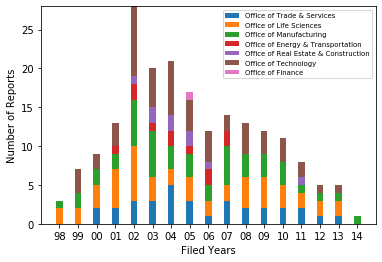

In [467]:
import numpy as np
import matplotlib.pyplot as plt


N = 17
#Energy = [0,0,0,6,12,6,12,6,12,12,0,0,0,0,0,0,0]
#Finance = [0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0]
#Life=[12,12,16,30,41,18,12,20,12,12,24,24,16,12,12,12,0]
#Manufacturing=[6,11,12,12,35,43,18,18,12,22,18,18,13,6,6,6,6]
#Real=[0,0,0,0,5,10,12,9,6,0,0,0,0,2,0,0,0]
#Technology=[0,22,12,22,48,30,46,28,28,12,24,18,18,12,6,6,0]
#Trade=[0,0,14,12,15,18,22,18,6,16,12,12,12,12,6,6,0]
Energy = [0,0,0,1,2,1,2,1,2,2,0,0,0,0,0,0,0]
Finance = [0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0]
Life=[2,2,3,5,7,3,2,3,2,2,4,4,3,2,2,2,0]
Manufacturing=[1,2,2,2,6,6,3,3,2,5,3,3,3,1,1,1,1]
Real=[0,0,0,0,1,2,2,2,1,0,0,0,0,1,0,0,0]
Technology=[0,3,2,3,9,5,7,4,4,2,4,3,3,2,1,1,0]
Trade=[0,0,2,2,3,3,5,3,1,3,2,2,2,2,1,1,0]


ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, Trade,width = width)
p2 = plt.bar(ind, Life,bottom=Trade,width = width)
bars1 = np.add(Trade, Life).tolist()
p3 = plt.bar(ind, Manufacturing,bottom=bars1,width = width)
bars2 = np.add(bars1,Manufacturing).tolist()
p4 = plt.bar(ind, Energy,bottom=bars2,width = width)
bars3 = np.add(bars2,Energy).tolist()

p5 = plt.bar(ind, Real,bottom=bars3,width = width)
bars4 = np.add(bars3,Real).tolist()1

p6 = plt.bar(ind, Technology,bottom=bars4,width = width)
bars5 = np.add(bars4,Technology).tolist()

p7 = plt.bar(ind, Finance,bottom=bars5, width = width)

plt.ylabel('Number of Reports')
plt.xlabel('Filed Years')
#plt.title('Reports by Year and Sectors')
plt.xticks(ind, ('98', '99', '00', '01', '02','03','04','05','06','07','08','09','10','11','12','13','14'))
#plt.yticks(np.arange(0, 81, 10))
#plt.legend(loc=3, fontsize = 'x-small')
plt.legend((p1[0], p2[0],p3[0],p4[0], p5[0],p6[0],p7[0]), ("Office of Trade & Services", "Office of Life Sciences","Office of Manufacturing",
                               'Office of Energy & Transportation', "Office of Real Estate & Construction", "Office of Technology", "Office of Finance"),fontsize = 'x-small')
#('Office of Energy & Transportation', 'Office of Finance',"Office of Life Sciences","Office of Manufacturing","Office of Technology"
#"Office of Real Estate & Construction","Office of Technology","Office of Trade & Services"))

#plt.figure(figsize=(20,20))
plt.savefig('Balance.png')

In [455]:
plt.savefig('Balance.png')

<Figure size 432x288 with 0 Axes>

In [367]:
table.to_latex("Balance.tex")

In [462]:
X2Fraud.shape

(201, 16)

In [463]:
X2NoFraud.shape

(962, 16)

In [464]:
X.shape

(1163, 95)

In [461]:
X2Fraud=X2[X2["target"]==1]
X2NoFraud=X2[X2["target"]==0]

In [356]:
X2Fraud.mean(axis=0)

target                                  1.000000
mda_positive_score                    101.592040
mda_negative_score                    251.407960
mda_polarity_score                     -0.375723
mda_average_sentence_length            18.333333
mda_percentage_of_complex_words         0.361309
mda_fog_index                           7.477857
mda_complex_word_count               3788.149254
mda_word_count                      10227.253731
mda_uncertainty_score                 237.915423
mda_constraining_score                 95.606965
mda_positive_word_proportion            0.009738
mda_negative_word_proportion            0.022931
mda_uncertainty_word_proportion         0.022582
mda_constraining_word_proportion        0.008964
dtype: float64

In [ ]:
X2NoFraud=X2NoFraud[:201]

In [361]:
X2NoFraud.mean(axis=0)

target                                  0.000000
mda_positive_score                    132.462687
mda_negative_score                    289.855721
mda_polarity_score                     -0.311783
mda_average_sentence_length            19.502488
mda_percentage_of_complex_words         0.365236
mda_fog_index                           7.947090
mda_complex_word_count               4691.293532
mda_word_count                      12810.467662
mda_uncertainty_score                 297.945274
mda_constraining_score                132.149254
mda_positive_word_proportion            0.010046
mda_negative_word_proportion            0.020542
mda_uncertainty_word_proportion         0.021939
mda_constraining_word_proportion        0.009152
dtype: float64

In [3]:
X.columns

Index(['SECFNAME', 'pre', 'mda_extract', 'FORM', 'CONAME', 'CIK', 'FDATE',
       'FYEAR', 'target', 'pre2', 'CONAMEYear', 'Company.Name', 'time',
       'Primary.SIC.Code', 'AccRec.DbtsT', 'Sales.TurnNt', 'COGS.costsgd',
       'Assets.Total', 'CurrAssetTot', 'PPE.TotalNet', 'DeprAmortTot',
       'AmrtOfIntang', 'SG.A.Expense', 'LT.Debt.Totl', 'CurrLiabsTot',
       'Income.IBEXi', 'Oper.Act.NCF', 'Fin.Actv.NCF', 'Comm.OrdinEQ',
       'ComSharOutst', 'CashSTInvest', 'InventTotQtl', 'DeferrTaxInc',
       'GrProfitMarg', 'EBIT.Marginn', 'NtProfitMarg', 'CashFLMargin',
       'ROA.finratio', 'ROE.RnCommEQ', 'EBITDAMargin', 'Acc.Payables',
       'InventoryPrx', 'AccRec.DbtsT_1', 'Sales.TurnNt_1', 'COGS.costsgd_1',
       'Assets.Total_1', 'CurrAssetTot_1', 'PPE.TotalNet_1', 'DeprAmortTot_1',
       'AmrtOfIntang_1', 'SG.A.Expense_1', 'LT.Debt.Totl_1', 'CurrLiabsTot_1',
       'Income.IBEXi_1', 'Oper.Act.NCF_1', 'InventoryPrx_1', 'Acc.Payables_1',
       'EBIT.Marginn_1', 'CashSTInvest

In [4]:
train=X[0:862]
val=X[862:862+153]
test=X[-148:]

In [362]:
train["target"].value_counts()


0    720
1    142
Name: target, dtype: int64

In [6]:
val["target"].value_counts()

0    123
1     30
Name: target, dtype: int64

In [7]:
test["target"].value_counts()

0    119
1     29
Name: target, dtype: int64

In [468]:
Fraud=X[X["target"]==1]
NoFraud=X[X["target"]==0]

In [469]:
X["preV2"]

0       item . managements discussion analysis financi...
1       item . managements discussion analysis financi...
2       item . managements discussion analysis financi...
3       item . managements discussion analysis financi...
4       item . managements discussion analysis financi...
                              ...                        
1158    item . managements discussion analysis financi...
1159    item . managements discussion analysis financi...
1160    item . managements discussion analysis financi...
1161    item . managements discussion analysis financi...
1162    item . managements discussion analysis financi...
Name: preV2, Length: 1163, dtype: object

In [10]:
def replaceacronyms(texts):
    acronym_dict={
        "of":"",
        "to":"",
        "a":"",
 "keyspans": 'KeySpan',
 'brigham': 'BRIGHAM',
 'cilcorp': 'CILCORP',
 'neupogen': 'Neupogen',
 'nels': 'NELS',
 'ksf': 'KSF',
 'amerens': 'AMEREN',
 'vse': 'VSE',
 'msd': 'MSD',
 'lifo': 'LIFO',
 'msa': 'MSA',
 'dte': 'DTE',
 'neulasta': 'Neulasta',
 'hewlett': 'Hewlett',
 'exogen': '',
 'novartis': 'NOVARTIS',
 'puc': 'PUC',
 'packard': 'PACKARD',
 'gecr': 'GECR',
 'nynex': 'NYNEX',
 'mckinnon': 'MCKINNON',
 'cte': 'CTE',
 'kendy': 'Kendy',
 'fcs': 'FCS',
 'stratic': 'Stratic',
 'puca': 'Puca',
 'genro': 'Genro',
 'citicorp': 'Citicorp',
 'entrez': 'Entrez',
 'gauk': 'Gauk',
 'voe': 'VOE',
 'ibrd': 'IBRD',
 'pharmerica': 'Pharmerica',
 'dbrn': 'DBRN',
 'palpal': 'Paypal',
 'pfc': 'PFC',
 'dso': 'DSO',
 'fifo': 'FIFO',
 'mdma': 'MDMA',
 'pwh': 'PWH',"inc.":"",
"and":"",
                  'gaap': "GAAP",
                    'eits': "EITS",
                    'wgeservices': "company",
                    'moodys': "MOODY",
                    'analyses': "analyzes",
                     "ipr":"IPR",
                    'sarbanes': "SOX",
                    'oxley': "SOX",
                    'endeddecember': "ended december",
                    'cancelled': "cancel",
                    "noncrime": "non crime",
                    "contractholder":"contract holder",
                     'lipa': "LIPA",
                     'macau': "MACAU",
                     'ravenswood': "RAVENSWOOD",
                    'apb': "APB",
                     'aspics': "aspic",
                     'ctt': "CTT",
                     'uaw': "UAW",
                     'wilco': "WILCO",
                     'niso': "NISO",
                     'keli':"KELI",
                     'grm':"GRM"}

    newtexts=[]
    for text in texts:
        newtext=" ".join([acronym_dict.get(i,i) for i in text.lower().split()])
        newtexts.append(newtext)
    return newtexts


In [11]:
texts=replaceacronyms(X["preV2"].tolist())

In [12]:
#texts=[k.replace(" . ",".") for k in texts] #this is so we dont have sentences with only one dot!!! pay attention,
#it doesnt work on nltk tokenie anymore to split the text into sentences!! you need " . " for it
#MDAS is a list of PREMDAs Sentences Lists (each el of Mdas contains a list of strings: all sentences in a document)
mdas = [text_to_word_sequence(texts[k],filters=".",lower=False,split=".") for k in range(len(texts))]

#labels is a list of all labels
labels=X["target"].tolist()
labels = to_categorical(np.asarray(labels))

    #here maxlen is the average word per sentence and max_sentence is the average sent per doc length
    #maxlen, max_sentences=CountSent_Word(mdas)

    #maxsentences 3816 seems very high, lets set it to 2*588
    #max_sentences=1200

    #on texts we can initialize our default keras tokenizer that turns text into space separated sequence of words and removes punctuation
tokenizer = Tokenizer(num_words=22000,lower=False, oov_token=None, filters=".")
tokenizer.fit_on_texts(texts)
word_index = tokenizer.word_index
    #word_index is a dict where words are tokenized into a number, its length is the number of unique tokens in our Corpus
print('Total %s unique tokens.' % len(word_index))
    #max_words is the total number of unique words in the whole corpus
max_words=len(word_index)

    #named list mapping words to number of docs they appeared on during fi
word_docs = tokenizer.word_docs
    #number of documents/texts/sequences the tokenizer was trained on = number of samples=18
    #document_count=tokenizer.document_count
    #dictionary with tokenzs and its counts in the whole corpus, it is ordered which means it remembers teh order in which its contents were added
word_counts = tokenizer.word_counts

    #initialize empty data array (input DL Model) with shape(samplessize,max sentence per doc size, max word per sentence size)


Total 30186 unique tokens.


In [ ]:
#Only Fraud Cases Text

In [470]:
textF=Fraud["preV2"].tolist()

In [477]:
tokenizerM = Tokenizer(num_words=22000,lower=False, oov_token=None, filters=".")
tokenizerM.fit_on_texts(textF)
word_indexM = tokenizerM.word_index
    #word_index is a dict where words are tokenized into a number, its length is the number of unique tokens in our Corpus
print('Total %s unique tokens.' % len(word_indexM))
    #max_words is the total number of unique words in the whole corpus
#max_wordsM=len(word_index)

    #named list mapping words to number of docs they appeared on during fi
word_docs = tokenizer.word_docs
    #number of documents/texts/sequences the tokenizer was trained on = number of samples=18
    #document_count=tokenizer.document_count
    #dictionary with tokenzs and its counts in the whole corpus, it is ordered which means it remembers teh order in which its contents were added
word_counts = tokenizer.word_counts

    #initialize empty data array (input DL M

Total 13557 unique tokens.


In [478]:
word_docs

defaultdict(int,
            {'significant': 1139,
             'reduced': 985,
             'hardware': 327,
             'can': 1081,
             'balances': 875,
             'recognition': 959,
             'evaluation': 511,
             'slower': 169,
             'measures': 533,
             'actual': 1099,
             'develop': 783,
             'manner': 569,
             'instance': 94,
             'sell': 882,
             'originally': 303,
             'events': 955,
             'efficient': 226,
             'virtualtape': 1,
             'showed': 73,
             'decline': 897,
             'covering': 265,
             'realized': 785,
             'operating': 1150,
             'rebounded': 7,
             'consultants': 278,
             'involves': 497,
             'election': 218,
             'standards': 995,
             'followed': 181,
             'tend': 159,
             'competing': 288,
             'workforce': 370,
             'anticipate': 79

In [479]:
from operator import itemgetter

In [480]:
sortedWords = sorted(word_docs.items(), key=itemgetter(1), reverse = True)

In [481]:
sortedWords

[('analysis', 1163),
 ('condition', 1163),
 ('managements', 1163),
 ('item', 1163),
 ('results', 1163),
 ('the', 1163),
 ('in', 1163),
 ('on', 1163),
 ('discussion', 1163),
 ('for', 1163),
 ('operations', 1163),
 ('financial', 1163),
 ('that', 1162),
 ('is', 1162),
 ('by', 1162),
 ('at', 1161),
 ('cash', 1161),
 ('are', 1161),
 ('as', 1161),
 ('not', 1161),
 ('which', 1160),
 ('other', 1160),
 ('with', 1160),
 ('or', 1159),
 ('from', 1159),
 ('year', 1159),
 ('this', 1159),
 ('market', 1158),
 ('be', 1157),
 ('interest', 1156),
 ('an', 1156),
 ('have', 1156),
 ('capital', 1155),
 ('will', 1154),
 ('these', 1154),
 ('statements', 1154),
 ('primarily', 1153),
 ('related', 1153),
 ('under', 1153),
 ('net', 1153),
 ('income', 1152),
 ('result', 1151),
 ('were', 1151),
 ('due', 1151),
 ('risk', 1151),
 ('operating', 1150),
 ('including', 1150),
 ('was', 1149),
 ('all', 1149),
 ('future', 1148),
 ('expenses', 1148),
 ('may', 1148),
 ('costs', 1148),
 ('certain', 1148),
 ('such', 1147),
 ('ap

In [16]:
sortedWords[-8000:]

[('slash', 2),
 ('provost', 2),
 ('incidentally', 2),
 ('destined', 2),
 ('overabundance', 2),
 ('bor', 2),
 ('abstractor', 2),
 ('boardroom', 2),
 ('wyomissing', 2),
 ('roskovensky', 2),
 ('granular', 2),
 ('coworkers', 2),
 ('summed', 2),
 ('antivirus', 2),
 ('mucociliary', 2),
 ('pegloticase', 2),
 ('uricase', 2),
 ('hyperuricemia', 2),
 ('urate', 2),
 ('flares', 2),
 ('otherdeductions', 2),
 ('overcharges', 2),
 ('layered', 2),
 ('federations', 2),
 ('gaist', 2),
 ('amplitude', 2),
 ('isochor', 2),
 ('cosmos', 2),
 ('vectis', 2),
 ('linger', 2),
 ('invite', 2),
 ('kill', 2),
 ('trainage', 2),
 ('neela', 2),
 ('rajendra', 2),
 ('casings', 2),
 ('embedding', 2),
 ('revolutions', 2),
 ('rpm', 2),
 ('writs', 2),
 ('cyst', 2),
 ('zogo', 2),
 ('sorters', 2),
 ('spif', 2),
 ('chelmsford', 2),
 ('pris', 2),
 ('neuroimmunophilin', 2),
 ('gangstas', 2),
 ('cyclosporine', 2),
 ('immunosuppressive', 2),
 ('macrophage', 2),
 ('chemoprotectant', 2),
 ('amifostine', 2),
 ('flt', 2),
 ('myelopoiet

In [17]:
news_path = '/home/RDC/crajapax/crajapax/DataCollection/Embeddings/GoogleNews-vectors-negative300/GoogleNews-vectors-negative300.bin'
embeddings_index = KeyedVectors.load_word2vec_format(news_path, binary=True)

In [18]:
import operator

In [19]:
wordlist=sortedWords[:22000]

In [535]:
def check_coverage(wordlist,word_index):
    a = {}
    oov = {}
    k = 0
    i = 0
    for word in wordlist:
        try:
            a[word[0]] = embeddings_index[word[0]]
            k += word_counts[word[0]]
        except:

            oov[word[0]] = word_counts[word[0]]
            i += word_counts[word[0]]
            pass
    print('Total absent words are',len(oov),'which is {:.2%} of vocab'.format(len(oov) / len(wordlist)))
    print('Found embeddings for {:.2%} of vocab'.format(len(a) / len(wordlist)))
    print('Found embeddings for  {:.2%} of all text'.format(k / (k + i)))
    sorted_x = sorted(oov.items(), key=operator.itemgetter(1))[::-1]

    return sorted_x

In [21]:
check_coverage(wordlist,word_index)

Total absent words are 3355 which is 15.25% of vocab
Found embeddings for 84.75% of vocab
Found embeddings for  99.58% of all text


[('epitra', 2531),
 ('keypals', 1425),
 ('ravenhood', 1348),
 ('fogas', 791),
 ('schooles', 680),
 ('quadrates', 558),
 ('enorn', 542),
 ('gamins', 525),
 ('brechams', 476),
 ('amerces', 379),
 ('araneose', 369),
 ('microdont', 364),
 ('botos', 358),
 ('toshier', 327),
 ('astream', 314),
 ('howlet', 309),
 ('obley', 307),
 ('tartanes', 306),
 ('nonarts', 295),
 ('nonuniversal', 290),
 ('pockard', 274),
 ('anadarkos', 273),
 ('imbu', 270),
 ('wirelike', 266),
 ('hoffmann', 245),
 ('kedge', 243),
 ('geic', 239),
 ('deaerates', 220),
 ('videograms', 193),
 ('hyperons', 179),
 ('norsel', 179),
 ('muts', 165),
 ('nitros', 163),
 ('neologic', 161),
 ('ladakin', 158),
 ('vired', 158),
 ('prizer', 158),
 ('napu', 157),
 ('energynorth', 154),
 ('polycots', 152),
 ('feres', 148),
 ('tripla', 140),
 ('adephagan', 139),
 ('bergen', 137),
 ('ciscos', 137),
 ('andersen', 136),
 ('glenwood', 136),
 ('arriva', 134),
 ('mobcaps', 133),
 ('darvon', 133),
 ('avalon', 133),
 ('ambisome', 132),
 ('flashvis

In [22]:
def CountSent_Word(dfcolumn):
    
    #texts is a list of strings: preprocessed MDA sections
    texts=dfcolumn.tolist()
    #texts=replaceacronyms(texts)
    #texts=[k.replace(" . ",".") for k in texts] #this is so we dont have sentences with only one dot!!! pay attention,
    #it doesnt work on nltk tokenie anymore to split the text into sentences!! you need " . " for it
    #MDAS is a list of PREMDAs Sentences Lists (each el of Mdas contains a list of strings: all sentences in a document)
    #mdas = [text_to_word_sequence(texts[k],filters=".",lower=True,split=".") for k in range(len(texts))]
    mdas = [gensim.summarization.textcleaner.split_sentences(texts[k]) for k in range(len(texts))]
    lenwords=[]
    lensent=[]
    for doc in mdas:
        for sent in doc:
            wordTokens = text_to_word_sequence(sent)
            lenwords.append(len(wordTokens))       
        lensent.append(len(doc))
    num_word=np.array(lenwords)
    num_sent=np.array(lensent)

    return(num_word,num_sent)

In [23]:
Fnum_word,Fnum_sent=CountSent_Word(Fraud["preV2"])
Nnum_word,Nnum_sent=CountSent_Word(NoFraud["preV2"])
num_word,num_sent=CountSent_Word(X["preV2"])

In [24]:
print("Average number of words in each sentence: ",round(np.mean(Fnum_word)),round(np.mean(Nnum_word)),round(np.mean(num_word)))
print("Average number of sentences in each document: ", round(np.mean(Fnum_sent)),round(np.mean(Nnum_sent)),round(np.mean(num_sent)))
print("Median number of words in each sentence: ",round(np.median(Fnum_word)),round(np.median(Nnum_word)),round(np.median(num_word)))
print("Median number of sentences in each document: ", round(np.median(Fnum_sent)),round(np.median(Nnum_sent)),round(np.median(num_sent)))
print("Quantile 95 number of words in each sentence: ",round(np.percentile(Fnum_word,95)),round(np.percentile(Nnum_word,95)),round(np.percentile(num_word,95)))
print("Quantile 95 number of sentences in each document: ", round(np.percentile(Fnum_sent,95)),round(np.percentile(Nnum_sent,95)),round(np.percentile(num_sent,95)))
print("Quantile 90 number of words in each sentence: ",round(np.percentile(Fnum_word,90)),round(np.percentile(Nnum_word,90)),round(np.percentile(num_word,90)))
print("Quantile 90 number of sentences in each document: ", round(np.percentile(Fnum_sent,90)),round(np.percentile(Nnum_sent,90)),round(np.percentile(num_sent,90)))


Average number of words in each sentence:  22.0 23.0 23.0
Average number of sentences in each document:  549.0 599.0 591.0
Median number of words in each sentence:  20.0 20.0 20.0
Median number of sentences in each document:  380.0 360.0 364.0
Quantile 95 number of words in each sentence:  45.0 47.0 47.0
Quantile 95 number of sentences in each document:  1849.0 1366.0 1443.0
Quantile 90 number of words in each sentence:  37.0 38.0 38.0
Quantile 90 number of sentences in each document:  953.0 901.0 908.0


In [25]:
maxlen=int(np.percentile(num_word,90))
max_sentences=int(np.percentile(num_sent,90))


In [26]:
data = np.zeros((len(mdas), max_sentences, maxlen), dtype='int32')

In [27]:
for k in range(len(mdas)):
    #data is one list per document k of lists of ints: each sentence in a doc is represented as a list of its word indexes
        data2=tokenizer.texts_to_sequences(mdas[k])
    #padded removes last words (truncating) per sentences of data and pads 0 at the end
        padded=pad_sequences(data2,maxlen,padding="post",truncating="post")
    #now we take the last max_sentences sentences and pad 0 vectors at the beginning of each document vector
        for l in range(len(padded)):
            if l < max_sentences:
                j=max_sentences-1-l
                data[k,j] = padded[len(padded)-1-l]
print('Shape of documents (data) tensor:', data.shape)
print('Shape of class (label) tensor:', labels.shape)


Shape of documents (data) tensor: (1163, 907, 38)
Shape of class (label) tensor: (1163, 2)


In [28]:
len(mdas[4])

345

In [550]:
data[100]

array([[   0,    0,    0, ...,    0,    0,    0],
       [   0,    0,    0, ...,    0,    0,    0],
       [   0,    0,    0, ...,    0,    0,    0],
       ...,
       [ 296,  448,  160, ...,  587,   65,   60],
       [   1,   17,   31, ...,  740,  271,  808],
       [6914,  443, 1008, ...,  132,   26,  577]], dtype=int32)

In [551]:
data.shape

(1163, 907, 38)

In [564]:
mdas[1][10]

' we may not generate sufficient revenue fund our operations in future periods '

In [565]:
res = dict((k, word_index[k]) for k in ["we", "may" ,"not", "generate", "sufficient" ,"revenue","fund", "our", "operations", "in", "future", "periods"] 
                                        if k in word_index) 

In [585]:
embedding_matrix[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

# Model Calibration

In [30]:
#define train/test k for this fold
x_train, x_test, x_val = data[train.index], data[test.index], data[val.index]
#y_train, y_test, y_val = labels[train.index], labels[test.index], labels[val.index]

In [31]:
y_train, y_test, y_val = labels[train.index], labels[test.index], labels[val.index]

In [32]:
print('Number of NoFraud and Fraud MDAs in training, validation and test set')
print(y_train.sum(axis=0))
print(y_val.sum(axis=0))
print(y_test.sum(axis=0))

Number of NoFraud and Fraud MDAs in training, validation and test set
[720. 142.]
[123.  30.]
[119.  29.]


In [33]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
#Comp Data
#dfsubset.iloc[:, 14:78]
#Ling Dat
#dfsubset.iloc[:, 78:]
#XQ is the qualitative (dense) features
from sklearn.preprocessing import StandardScaler, MinMaxScaler

XQ=X.iloc[:, 14:].drop(["Office","Industry.Title","preV2"],axis=1)
from numpy import float32
XQ = XQ.astype(float32)
XQ=XQ.replace(-np.inf,-3.0028235e+38)
XQ=XQ.replace(np.inf,3.0028235e+38)
sc =MinMaxScaler(copy=True,feature_range=(0,1)) 
XQ = sc.fit_transform(XQ)


In [586]:
XQ_train.columns

Index(['AccRec.DbtsT', 'Sales.TurnNt', 'COGS.costsgd', 'Assets.Total',
       'CurrAssetTot', 'PPE.TotalNet', 'DeprAmortTot', 'AmrtOfIntang',
       'SG.A.Expense', 'LT.Debt.Totl', 'CurrLiabsTot', 'Income.IBEXi',
       'Oper.Act.NCF', 'Fin.Actv.NCF', 'Comm.OrdinEQ', 'ComSharOutst',
       'CashSTInvest', 'InventTotQtl', 'DeferrTaxInc', 'GrProfitMarg',
       'EBIT.Marginn', 'NtProfitMarg', 'CashFLMargin', 'ROA.finratio',
       'ROE.RnCommEQ', 'EBITDAMargin', 'Acc.Payables', 'InventoryPrx',
       'AccRec.DbtsT_1', 'Sales.TurnNt_1', 'COGS.costsgd_1', 'Assets.Total_1',
       'CurrAssetTot_1', 'PPE.TotalNet_1', 'DeprAmortTot_1', 'AmrtOfIntang_1',
       'SG.A.Expense_1', 'LT.Debt.Totl_1', 'CurrLiabsTot_1', 'Income.IBEXi_1',
       'Oper.Act.NCF_1', 'InventoryPrx_1', 'Acc.Payables_1', 'EBIT.Marginn_1',
       'CashSTInvest_1', 'DSR', 'GMI', 'AQI', 'SGI', 'DEPI', 'SGAI', 'LEVI',
       'ACCRUALS', 'PROBM', 'AverageTA', 'CFF', 'Leverage', 'dWC_Accruals',
       'dReceivables', 'dInventori

In [34]:
XQ_train, XQ_test, XQ_val=XQ[train.index], XQ[test.index], XQ[val.index]

In [35]:
class AttentionLayer(Layer):
    """
    Hierarchial Attention Layer as described by Hierarchical Attention Networks for Document Classification(2016)
    - Yang et. al.
    Source: https://www.cs.cmu.edu/~hovy/papers/16HLT-hierarchical-attention-networks.pdf
    Theano backend
    """
    def __init__(self,attention_dim=300,return_coefficients=False,**kwargs):
        # Initializer 
        self.supports_masking = True
        self.return_coefficients = return_coefficients
        self.init = initializers.get('glorot_uniform') # initializes values with uniform distribution
        self.attention_dim = attention_dim
        super(AttentionLayer, self).__init__(**kwargs)

    def build(self, input_shape):
        # Builds all weights
        # W = Weight matrix, b = bias vector, u = context vector
        assert len(input_shape) == 3
        self.W = K.variable(self.init((input_shape[-1], self.attention_dim)),name='W')
        self.b = K.variable(self.init((self.attention_dim, )),name='b')
        self.u = K.variable(self.init((self.attention_dim, 1)),name='u')
        self.trainable_weights = [self.W, self.b, self.u]

        super(AttentionLayer, self).build(input_shape)

    def compute_mask(self, input, input_mask=None):
        return None

    def call(self, hit, mask=None):
        # Here, the actual calculation is done
        uit = K.bias_add(K.dot(hit, self.W),self.b)
        uit = K.tanh(uit)
        
        ait = K.dot(uit, self.u)
        ait = K.squeeze(ait, -1)
        ait = K.exp(ait)
        
        if mask is not None:
            ait *= K.cast(mask, K.floatx())

        ait /= K.cast(K.sum(ait, axis=1, keepdims=True) + K.epsilon(), K.floatx())
        ait = K.expand_dims(ait)
        weighted_input = hit * ait
        
        if self.return_coefficients:
            return [K.sum(weighted_input, axis=1), ait]
        else:
            return K.sum(weighted_input, axis=1)

    def compute_output_shape(self, input_shape):
        if self.return_coefficients:
            return [(input_shape[0], input_shape[-1]), (input_shape[0], input_shape[-1], 1)]
        else:
            return input_shape[0], input_shape[-1]

In [545]:
#Create Embedding Matrix
embedding_dim = 300      # vector size of word embedding
embedding_matrix = np.zeros((len(word_index) + 1, embedding_dim))
embeddedCount=0
absent_words = 0
min_wordCount = 2
small_words = 0
a = {}
oov = {}
k = 0
i = 0
#because i starts at 1, we have to set matrix first index to 1-1=0
for word, i in  word_index.items(): 
    if word_counts[word] > min_wordCount:
        if word in embeddings_index:
                embedding_matrix[i] = embeddings_index[word]
                embeddedCount+=1
                a[word] = embeddings_index[word]
                k += word_counts[word]
        else:
                oov[word] = word_counts[word]
                i += word_counts[word]
                absent_words += 1
    else:
        small_words += 1
print(embeddedCount)

18302


In [544]:
len(embedding_matrix)

30187

In [37]:
print('Total absent words are',len(oov),'which is {:.2%} of vocab'.format(len(oov) / (len(word_counts)-small_words)))
print('Found embeddings for {:.2%} of vocab'.format(len(a) / (len(word_counts)-small_words)))
print('Found embeddings for  {:.2%} of all text'.format(k / (k + i)))
print('Words with 2 or less mentions are',small_words, "which is  {:.2%} of all text".format(small_words / len(word_counts)))
sorted_x = sorted(oov.items(), key=operator.itemgetter(1))[::-1]

Total absent words are 3173 which is 14.78% of vocab
Found embeddings for 85.22% of vocab
Found embeddings for  99.81% of all text
Words with 2 or less mentions are 8711 which is  28.86% of all text


In [540]:
def display_pca_scatterplot(model, words, sample):
    if words == None:
        if sample > 0:
            words = np.random.choice(list(a.keys()), sample)
        else:
            words = [ word for word in model.vocab ]
        
    word_vectors = np.array([model[w] for w in words])

    twodim = PCA().fit_transform(word_vectors)[:,:2]
    
    #plt.figure(figsize=(10,10))
    plt.savefig('Embedding.png',figsize=(10,10))
    plt.scatter(twodim[:,0], twodim[:,1], edgecolors='k', c='r')
    for word, (x,y) in zip(words, twodim):
        plt.text(x+0.05, y+0.05, word)
    plt.savefig('Embedding.png',figsize=(10,10))
#display_pca_scatterplot(embeddings_index, test2, 0)

In [541]:
test2=text_to_word_sequence(mdas[0][200],lower=False)

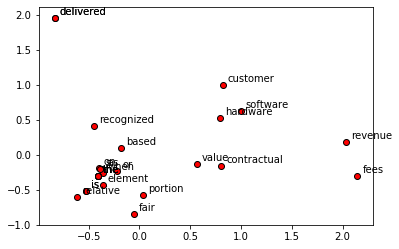

In [542]:
display_pca_scatterplot(embeddings_index, test2, 0)

In [491]:
from sklearn.decomposition import PCA

In [313]:
def sensitivity(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    return true_positives / (possible_positives + K.epsilon())

def specificity(y_true, y_pred):
    true_negatives = K.sum(K.round(K.clip((1-y_true) * (1-y_pred), 0, 1)))
    possible_negatives = K.sum(K.round(K.clip(1-y_true, 0, 1)))
    return true_negatives / (possible_negatives + K.epsilon())


In [330]:
def HAN(embedding_matrix,word_index,maxlen,max_sentences,a,b,c):
    #Create Keras functional model for hierarchical attention network
    
    embedding_layer = Embedding(len(word_index) + 1,embedding_dim,weights=[embedding_matrix], 
                                input_length=maxlen, trainable=False,name='word_embedding')

    # Words level attention model
    word_input = Input(shape=(maxlen, ), dtype='int32',name='word_input')
    word_sequences = embedding_layer(word_input)
    word_lstm = Bidirectional(LSTM(a, return_sequences=True),name='word_lstm')(word_sequences)

    word_dense = Dense(b, activation='relu', name='word_dense')(word_lstm) 
    word_att,word_coeffs = AttentionLayer(embedding_dim,True,name='word_attention')(word_dense)
    #word_drop = Dropout(0.3,name='word_dropout')(word_att)
    wordEncoder = Model(inputs = word_input,outputs = word_att)
    
    # Sentence level attention model
    sent_input = Input(shape=(max_sentences,maxlen), dtype='int32',name='sent_input')
    sent_encoder = TimeDistributed(wordEncoder,name='sent_linking')(sent_input)
    sent_lstm = Bidirectional(LSTM(a, return_sequences=True),name='sent_lstm')(sent_encoder)
    sent_dense = Dense(b, activation='relu', name='sent_dense')(sent_lstm) 
    sent_att,sent_coeffs = AttentionLayer(embedding_dim,return_coefficients=True,name='sent_attention')(sent_dense)
    sent_drop = Dropout(0.5,name='sent_dropout')(sent_att)

    # Numerical Feature model
    meta_input = Input(shape=(78,), name='meta_input')

    x = concatenate([sent_drop, meta_input])
    x = Dense(c, activation='relu')(x)

    preds = Dense(2, activation='softmax',name='output')(x)

        # Model compile
    model = Model([sent_input,meta_input], preds)
    model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['acc',sensitivity,specificity])
        
    print(wordEncoder.summary())
    print(model.summary())
    return model, sent_input, sent_coeffs





In [67]:
#M.save_obj(embedding_matrix,"embedding_matrix_lower")
#M.save_obj(word_index,"word_index_lower")
#M.save_obj(mdas,"mdas_lower")
#M.save_obj(data,"data_lower")
#M.save_obj(labels,"labels_lower")

In [338]:
newmodel=HAN(embedding_matrix,word_index,maxlen,max_sentences,50,100,6)

Model: "model_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
word_input (InputLayer)      (None, 38)                0         
_________________________________________________________________
word_embedding (Embedding)   (None, 38, 300)           9056100   
_________________________________________________________________
word_lstm (Bidirectional)    (None, 38, 100)           140400    
_________________________________________________________________
word_dense (Dense)           (None, 38, 100)           10100     
_________________________________________________________________
word_attention (AttentionLay [(None, 100), (None, 100, 30600     
Total params: 9,267,800
Trainable params: 181,100
Non-trainable params: 9,086,700
_________________________________________________________________
None
Model: "model_30"
_____________________________________________________________________________________

In [332]:
from keras.callbacks import Callback, ModelCheckpoint,EarlyStopping

In [333]:
RocAuc = M.RocAucEvaluation(validation_data=([x_val,XQ_val], y_val), interval=1)


In [326]:
parameters=[(50,100,6),(150,200,6),(300,200,6)]

In [334]:
checkpointer = ModelCheckpoint("lower.{epoch:02d}-{val_loss:.2f}.hdf5", monitor='val_loss', verbose=0, save_best_only=False, save_weights_only=False, mode='auto', period=1)

In [335]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)

In [339]:
Han1 = newmodel[0].fit([x_train,XQ_train], y_train, validation_data=([x_val,XQ_val], y_val), epochs=12, batch_size=32 ,callbacks=[RocAuc,checkpointer,early_stop])


ValueError: Error when checking target: expected output to have shape (2,) but got array with shape (1,)

In [89]:
#from keras.models import load_model
#model1[0].load_weights('lower.09-0.49.hdf5')

AttributeError: 'str' object has no attribute 'decode'

# Model Performance

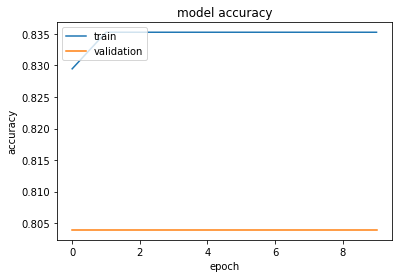

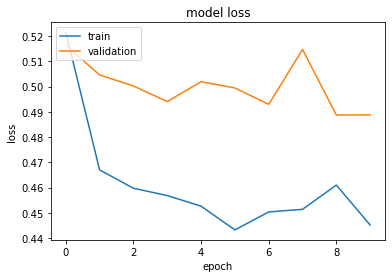

In [93]:
M.PlotAccLoss(Han1)

In [94]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# HAN Model Evaluation on Val Set

In [96]:
#Model Evaluation on Val Set
loss_val, acc_val= model1[0].evaluate([x_val,XQ_val], y_val)

153/153 [==============================] - 100s 652ms/step


In [102]:
print(acc_val)
print(loss_val)

0.8039215803146362
0.4887993059127159


In [129]:
y_pred_val=model1[0].predict([x_val,XQ_val],batch_size=None,verbose=0,steps=5)

In [127]:
y_pred_val = np.argmax(y_pred_val, axis=1)
y_val= np.argmax(y_val, axis=1)

AxisError: axis 1 is out of bounds for array of dimension 1

In [132]:
y_pred_val.tolist()

[[0.8195706009864807, 0.18042942881584167],
 [0.8238035440444946, 0.17619644105434418],
 [0.8308919668197632, 0.16910801827907562],
 [0.8323532342910767, 0.16764678061008453],
 [0.8095625638961792, 0.190437451004982],
 [0.8090653419494629, 0.19093464314937592],
 [0.8093822598457336, 0.19061772525310516],
 [0.8051514029502869, 0.19484859704971313],
 [0.8125632405281067, 0.18743672966957092],
 [0.814200222492218, 0.18579979240894318],
 [0.7981836795806885, 0.20181633532047272],
 [0.8293598294258118, 0.17064018547534943],
 [0.7980352640151978, 0.20196473598480225],
 [0.8608387112617493, 0.13916130363941193],
 [0.7901394963264465, 0.20986048877239227],
 [0.8259099125862122, 0.17409007251262665],
 [0.7856137156486511, 0.21438631415367126],
 [0.8228265047073364, 0.17717349529266357],
 [0.8135817646980286, 0.18641822040081024],
 [0.800597608089447, 0.19940237700939178],
 [0.7959655523300171, 0.2040344476699829],
 [0.8437163829803467, 0.15628360211849213],
 [0.8640003800392151, 0.1359995901584

In [108]:
score_val=roc_auc_score(y_val,y_pred_val)

In [117]:
#cm_val=confusion_matrix(y_val, y_pred_val)
#total_val = sum(sum(cm_val))
#acc_val = (cm_val[0, 0] + cm_val[1, 1]) / total_val
#specificity_val = cm_val[0, 0] / (cm_val[0, 0] + cm_val[0, 1])
#sensitivity_val = cm_val[1, 1] / (cm_val[1, 0] + cm_val[1, 1])

In [118]:
#cm_val

array([[123,   0],
       [ 30,   0]])

# HAN Model Evaluation on Test Set

In [308]:
#Model Evaluation on Test Set
loss, acc= model1[0].evaluate([x_test,XQ_test], y_test)
print("Test set accuracy: ",acc)
print("Test set loss: ", loss)

148/148 [==============================] - 112s 756ms/step
Test set accuracy:  0.8040540814399719
Test set loss:  0.4978872602050369


In [309]:
y_pred_test=model1[0].predict([x_test,XQ_test],batch_size=None,verbose=0,steps=None)

In [311]:
score_test=roc_auc_score(y_test,y_pred_test)

In [312]:
score_test

0.42683280208635177

# ML Model Validation Set

In [98]:
XQ=X.iloc[:, 14:].drop(["Office","Industry.Title","preV2"],axis=1)
from numpy import float32
XQ = XQ.astype(float32)
XQ=XQ.replace(-np.inf,-3.0028235e+38)
XQ=XQ.replace(np.inf,3.0028235e+38)


In [99]:
sc =MinMaxScaler(copy=True,feature_range=(0,1)) 
XQ[XQ.columns] = sc.fit_transform(XQ[XQ.columns])

In [100]:
XQ_train, XQ_test, XQ_val=XQ.iloc[train.index], XQ.iloc[test.index], XQ.iloc[val.index]

In [101]:
x2_train=pd.concat([X["pre2"].iloc[train.index],XQ_train], axis=1)
y2_train=X["target"].iloc[train.index]
x2_val=pd.concat([X["pre2"].iloc[val.index],XQ_val], axis=1)
y2_val=X["target"].iloc[val.index]
x2_test=pd.concat([X["pre2"].iloc[test.index],XQ_test], axis=1)
y2_test=X["target"].iloc[test.index]

In [151]:
MLmodels=CombiModelsEval("None",0,x2_train,x2_val,y2_train,y2_val)

(862, 18541)


/home/RDC/crajapax/.conda/envs/kerasspring/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/RDC/crajapax/.conda/envs/kerasspring/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/RDC/crajapax/.conda/envs/kerasspring/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [152]:
resultsdict,rocdicts,forest_importance,rf_importance,Xcol=MLmodels

In [119]:
resultsdict["HaN_LSTM"]=(score_val,sensitivity_val,specificity_val,acc_val)

In [153]:
PerformanceSummary(resultsdict)

,Forest,RFModelSelection,SVM_lin,SVM_rbf,LR,NB
roc_auc_score,0.616667,0.683333,0.871545,0.600000,0.917073,0.779675
roc_auc,0.616667,0.683333,0.871545,0.600000,0.917073,0.779675
sensitivity,0.233333,0.366667,0.800000,0.200000,0.866667,0.933333
specificity,1.000000,1.000000,0.943089,1.000000,0.967480,0.626016
accuracy,0.849673,0.875817,0.915033,0.843137,0.947712,0.686275


In [120]:
M.PerformanceSummary(resultsdict)

,Forest,RFModelSelection,SVM_lin,SVM_rbf,LR,NB,HaN_LSTM
roc_auc,0.645935,0.666667,0.871545,0.600000,0.917073,0.779675,0.500000
sensitivity,0.300000,0.333333,0.800000,0.200000,0.866667,0.933333,0.000000
specificity,0.991870,1.000000,0.943089,1.000000,0.967480,0.626016,1.000000
accuracy,0.856209,0.869281,0.915033,0.843137,0.947712,0.686275,0.803922


In [121]:
rocdicts["HaN_LSTM"]=roc_curve(y_val,y_pred_val)

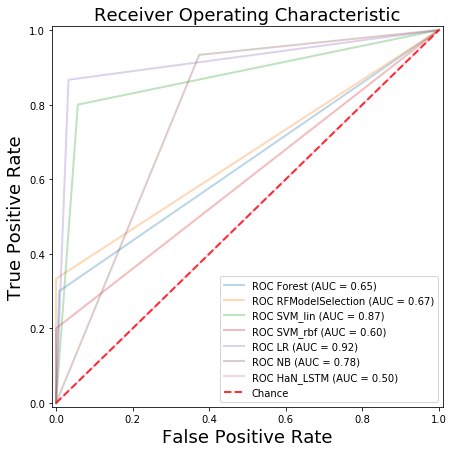

In [122]:
M.Roc(rocdicts,"Combi_lower")

# Evaluation on Test Set

In [340]:
MLmodels2=CombiModelsEval("None",0,x2_train,x2_test,y2_train,y2_test)

(862, 18541)


/home/RDC/crajapax/.conda/envs/kerasspring/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/RDC/crajapax/.conda/envs/kerasspring/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/RDC/crajapax/.conda/envs/kerasspring/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [342]:
resultsdict2,rocdicts2,forest_importance2,rf_importance2,Xcol2=MLmodels2

In [343]:
PerformanceSummary(resultsdict2)

,Forest,RFModelSelection,SVM_lin,SVM_rbf,LR,NB
roc_auc_score,0.500000,0.500000,0.471892,0.500000,0.501304,0.464938
roc_auc,0.500000,0.500000,0.471892,0.500000,0.501304,0.464938
sensitivity,0.000000,0.000000,0.103448,0.000000,0.103448,0.551724
specificity,1.000000,1.000000,0.840336,1.000000,0.899160,0.378151
accuracy,0.804054,0.804054,0.695946,0.804054,0.743243,0.412162


# Evaluation on Train Set

In [347]:
MLmodels3=CombiModelsEval("None",0,x2_train,x2_train,y2_train,y2_train)

(862, 18541)


/home/RDC/crajapax/.conda/envs/kerasspring/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/RDC/crajapax/.conda/envs/kerasspring/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/RDC/crajapax/.conda/envs/kerasspring/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [348]:
resultsdict3,rocdicts3,forest_importance3,rf_importance3,Xcol3=MLmodels3

In [349]:
PerformanceSummary(resultsdict3)

,Forest,RFModelSelection,SVM_lin,SVM_rbf,LR,NB
roc_auc,0.975352,1.0,1.0,0.982394,1.0,0.850499
sensitivity,0.950704,1.0,1.0,0.964789,1.0,0.971831
specificity,1.000000,1.0,1.0,1.000000,1.0,0.729167
accuracy,0.991879,1.0,1.0,0.994200,1.0,0.769142


In [345]:
def PerformanceSummary(resultsdict):
    column_names = ["roc_auc",'sensitivity',"recall",'specificity','accuracy']
    return pd.DataFrame(resultsdict, index=column_names)

In [346]:
def calculate_performance(y_val, y_pred_val):
    cm_val=confusion_matrix(y_val, y_pred_val)
    total_val = sum(sum(cm_val))
    acc_val2 = (cm_val[0, 0] + cm_val[1, 1]) / total_val
    specificity = cm_val[0, 0] / (cm_val[0, 0] + cm_val[0, 1])
    sensitivity = cm_val[1, 1] / (cm_val[1, 0] + cm_val[1, 1])
  
    #specificity = np.sum(true_negatives) / np.sum(actual_negatives)

    recall = recall_score(y_val, y_pred_val)
    accuracy=accuracy_score(y_val, y_pred_val)
    fpr, tpr, t = roc_curve(y_val, y_pred_val)
    roc_auc = auc(fpr, tpr)
    #roc_auc_score2 =roc_auc_score(y_val,y_pred_val)
    #roc auc score und roc_auc sind das gleiche
    return (roc_auc,sensitivity,recall,specificity,accuracy)

In [148]:
def CombiModelsEval(featureselection,number_of_chi2features,X_train,X_test,y_train,y_test):

    XC_train, XC_test= X_train.drop("pre2", axis=1), X_test.drop("pre2", axis=1)
    # create a count vectorizer object 
    count = CountVectorizer(analyzer='word',stop_words='english')

    # transform the training and validation data using count vectorizer object
    XT_train =  count.fit_transform(X_train["pre2"])
    XT_test =  count.transform(X_test["pre2"])
    X_train=hstack([XT_train,XC_train]).todense()
    X_test=hstack([XT_test,XC_test]).todense()
    print(X_train.shape)
    Xcol=np.concatenate((np.array(count.get_feature_names()), np.array(XC_train.columns)), axis=0)
       

    if (featureselection=="chi2"):
        chi2_selector = SelectKBest(chi2, k=number_of_chi2features)
           
        X_train = chi2_selector.fit_transform(X_train,y_train)
        X_test=X_test[:,chi2_selector.get_support()]
        chi2importance=chi2_selector.get_support()

    elif (featureselection=="None"):
        X_train=X_train


    # %% Random forests
    forest = RandomForestClassifier().fit(X_train, y_train)
    forest_importance = forest.feature_importances_

    y_pred = forest.predict(X_test)
    print(y_pred)
    print(y_test)
    forest_results = calculate_performance(y_test, y_pred)
    forest_rocdict=roc_curve(y_test, y_pred)
        
    # %% Random forests with ModelSelection
    sel = SelectFromModel(RandomForestClassifier(n_estimators = 1000)).fit(X_train, y_train)
    X_important_train = sel.transform(X_train)
    X_important_test = sel.transform(X_test)
    rf_important = RandomForestClassifier(n_estimators=1000, random_state=0, n_jobs=-1)
    rf_important.fit(X_important_train, y_train)
    rf_importance = rf_important.feature_importances_
    y_important_pred = rf_important.predict(X_important_test)
    rf_results = calculate_performance(y_test, y_important_pred)
    rf_rocdict=roc_curve(y_test, y_important_pred)

    # %% SVM (Support Vector Machine) Linear
    svm = SVC(kernel='linear').fit(X_train, y_train)
    y_pred = svm.predict(X_test)       
    svm_results_linear = calculate_performance(y_test, y_pred)
    svm_lin_rocdict=roc_curve(y_test, y_pred)

    # %% SVM (Support Vector Machine) RBF
    svm = SVC(kernel='rbf').fit(X_train, y_train)  
    y_pred = svm.predict(X_test)   
    svm_results_rbf = calculate_performance(y_test, y_pred)
    svm_rbf_rocdict=roc_curve(y_test, y_pred)
        
    # %% Logistic Regression
    lr = LogisticRegression().fit(X_train, y_train)   
    y_pred = lr.predict(X_test)      
    lr_results = calculate_performance(y_test, y_pred)
    lr_rocdict=roc_curve(y_test, y_pred)
        
    # %% Naive Bayes
    clf = MultinomialNB().fit(X_train, y_train)
    y_pred = clf.predict(X_test)         
    nb_results = calculate_performance(y_test, y_pred)
    nb_rocdict=roc_curve(y_test, y_pred)

        
    

    resultsdict={"Forest": forest_results,
                "RFModelSelection": rf_results,
                "SVM_lin" : svm_results_linear,
                "SVM_rbf" : svm_results_rbf,
                "LR" :lr_results,
                "NB" : nb_results}
    rocdicts={"Forest": forest_rocdict, 
                "RFModelSelection": rf_rocdict,          
                "SVM_lin" : svm_lin_rocdict,
                "SVM_rbf" : svm_rbf_rocdict,
                "LR" :lr_rocdict,
                "NB" : nb_rocdict}

    return resultsdict,rocdicts,forest_importance,rf_importance,Xcol

# Print Sentences

In [188]:
data.shape

(1163, 907, 38)

In [203]:
input_array.shape

(907, 38)

In [300]:
input_array=data[859]

In [301]:
sent_att_weights = Model(inputs=model1[1],outputs=model1[2])
output_array = sent_att_weights.predict(np.resize(input_array,(1,max_sentences,maxlen)))

In [302]:
sent_index

[698, 701, 712, 713, 716]

In [303]:
# Get n sentences with most attention in document
n_sentences = 5
sent_index = output_array.flatten().argsort()[-n_sentences:]
sent_index = np.sort(sent_index)
sent_index = sent_index.tolist()

sent_index2=[(max_sentences-k) for k in sent_index]


In [304]:
sent_index2

[719, 718, 716, 711, 710]

In [305]:
# Create summary using n sentences
sent_list = text_to_word_sequence(train["pre"][859],filters="",lower=True,split=".")
sent_list2 =gensim.summarization.textcleaner.split_sentences(train["mda_extract"][859])
summary = [sent_list[i] for i in sent_index2]
summary2 = [sent_list2[i] for i in sent_index2]

In [306]:
summary2

['Deferred unrealized gains of $1.1 million related to open cash flow hedges are also recorded in accumulated other comprehensive loss as of March 31, 2013 and these forward contracts will be revalued in future periods until the related inventory is sold, at which time the resulting gains or losses will be reclassified to cost of goods sold.',
 'Deferred realized losses of $0.6 million are recorded in accumulated other comprehensive loss at March 31, 2013, and are expected to be reclassified to cost of goods sold when the related inventory is sold.',
 'If the underlying transaction being hedged fails to occur or if a portion of the hedge does not generate offsetting changes in the foreign currency exposure of forecasted inventory purchases, we immediately recognize the gain or loss on the associated financial instrument in other income (expense).',
 'We have designated these derivatives as cash flow hedges.',
 'The primary risk managed by using derivative instruments is the foreign cur

In [299]:
train["target"]==1

0       True
1      False
2      False
3      False
4      False
       ...  
857    False
858    False
859     True
860    False
861    False
Name: target, Length: 862, dtype: bool